In [1]:
import numpy
import torch
import math as m
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x_values = pd.read_csv('day_head_circumference.csv', usecols=['# day']).to_numpy().reshape(-1, 1)
y_values = pd.read_csv('day_head_circumference.csv', usecols=['head circumference']).to_numpy().reshape(-1, 1)

x_train = torch.Tensor(x_values)
y_train = torch.Tensor(y_values)

In [3]:
def sigmoid_function(z):
    return 1/(1+m.e**-z)

class NonLinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def f(self, x):
        return 20 * sigmoid_function(x @ self.W + self.b) + 31

    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))

In [4]:
model = NonLinearRegressionModel()

optimizer = torch.optim.SGD([model.W, model.b], 0.00000001)
for epoch in range(10000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.0026]], requires_grad=True), b = tensor([[-0.0001]], requires_grad=True), loss = tensor(2.6773, grad_fn=<MeanBackward0>)


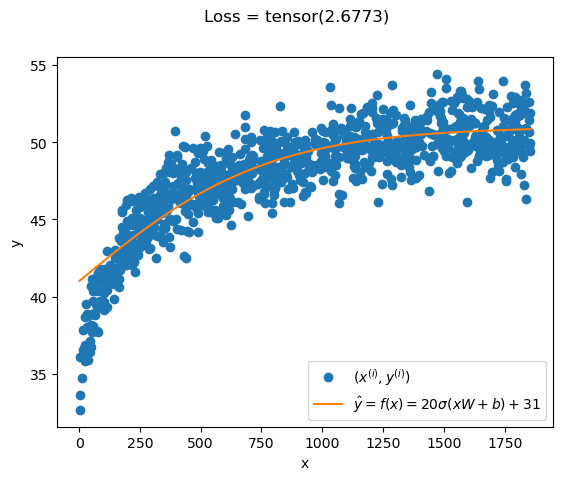

In [6]:
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
xModel = torch.from_numpy(numpy.linspace(min(x_values), max(x_values))).float()
yModel = model.f(xModel)
plt.plot(xModel, yModel.detach(), label='$\\hat y = f(x) = 20σ(xW+b)+31$')
plt.legend()
plt.suptitle("Loss = " + str(model.loss(x_train, y_train).data))
plt.show()